In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, precision_score, recall_score

from scipy.cluster.hierarchy import dendrogram, linkage 

from sklearn.metrics import silhouette_score

Заказчик предоставил данные клиентских анкет в формате csv (личные данные клиентов, а также инфорация о посещениях, покупках и текущем статусе абонемента). В нашем распоряжении есть данные на месяц до оттока и факт оттока в определённый месяц. Цель исследования - разработать стратегию для удержания клиентов.

Задачи:

- построить модель для прогнозирования оттока на следующий месяц
- провести кластеризацию клиентов
- определить, какие признаки влияют на отток
- сформировать рекомендации по взаимодействию с клиентами

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [4]:
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


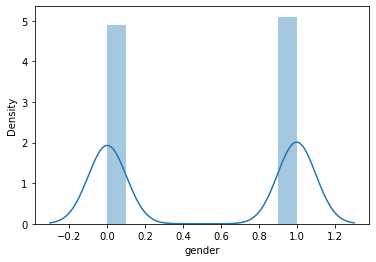

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


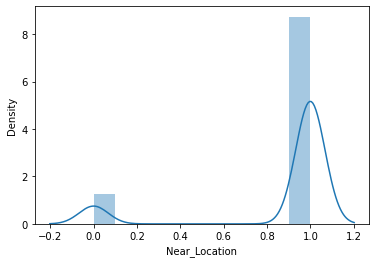

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


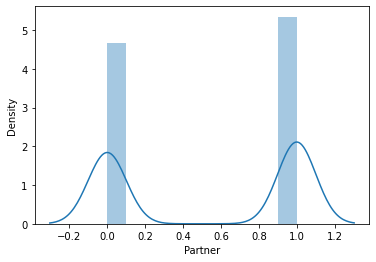

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


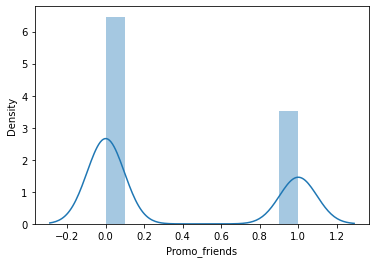

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


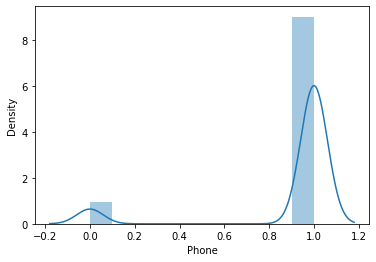

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


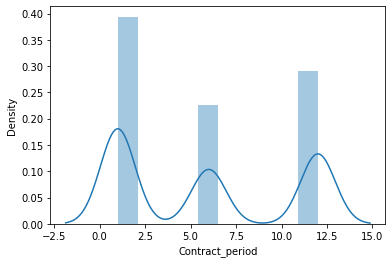

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


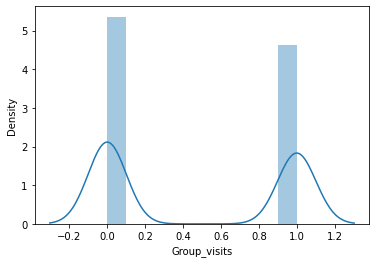

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


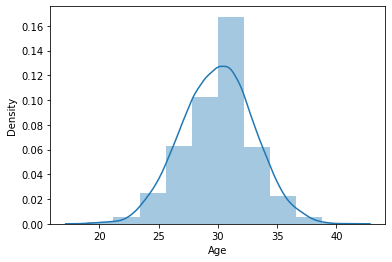

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


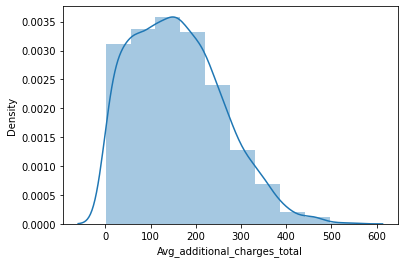

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


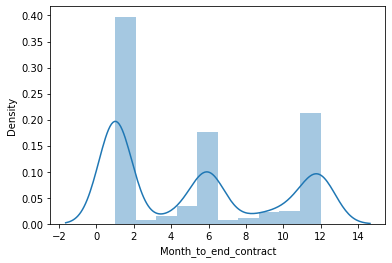

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


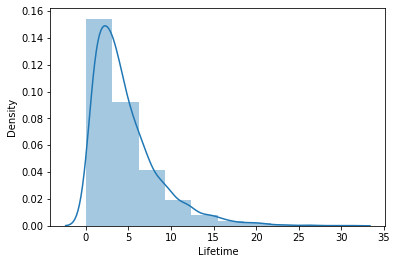

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


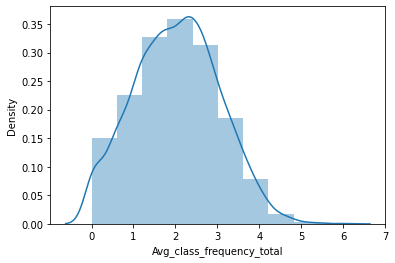

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


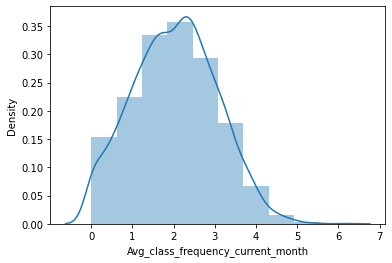

In [5]:
#построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

#разбивка на группы по факту оттока
churn0 = df.loc[df['Churn']==0].drop('Churn', axis =1)
churn1 =df.loc[df['Churn']==1].drop('Churn', axis =1)

# строим гистограммы для тех, кто остался

for feature in churn0.columns:
    sns.distplot(churn0[feature], bins=10)
    plt.show() 

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


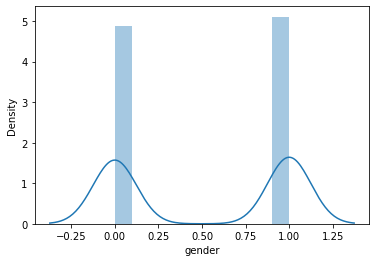

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


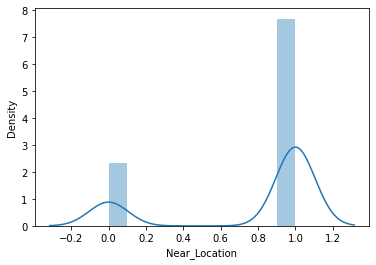

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


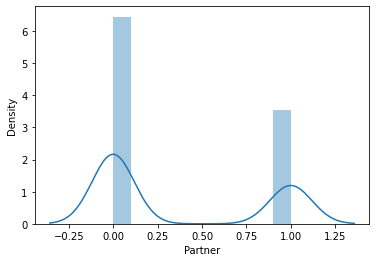

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


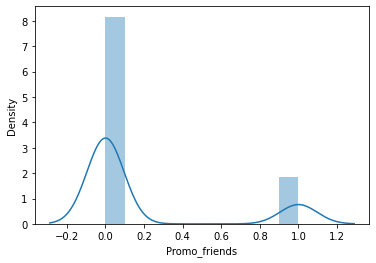

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


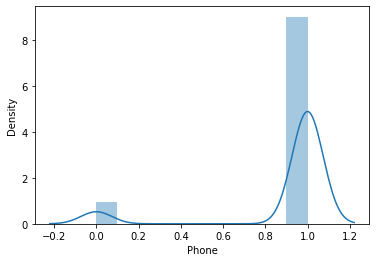

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


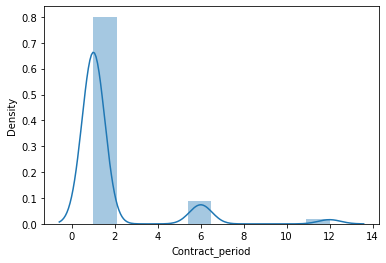

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


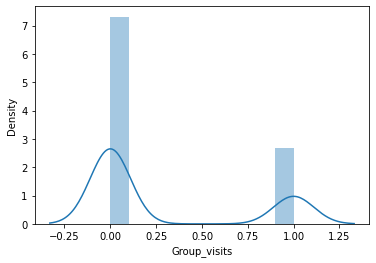

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


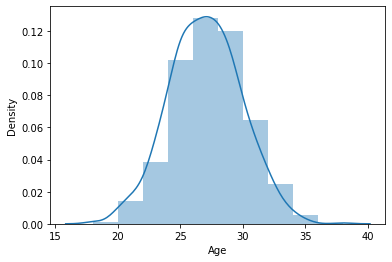

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


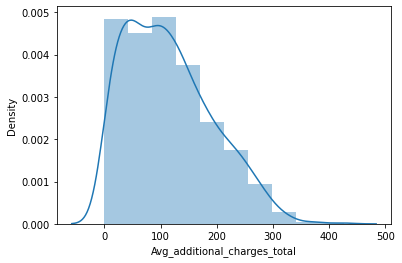

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


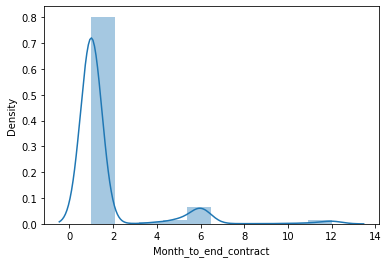

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


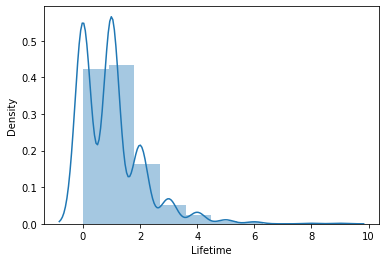

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


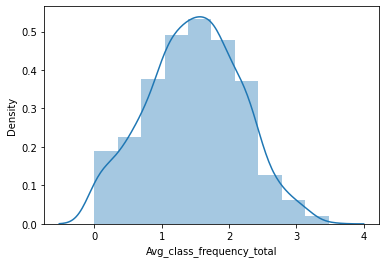

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


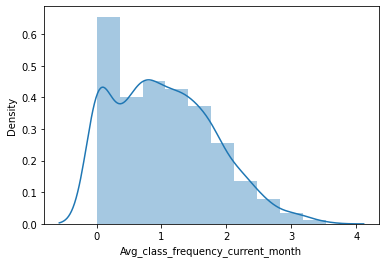

In [6]:
# для тех, кто ушёл

for feature in churn1.columns:
    sns.distplot(churn1[feature], bins=10)
    plt.show() 

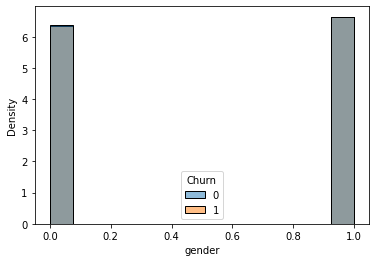

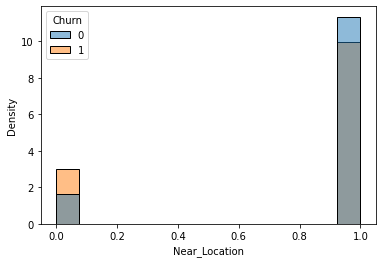

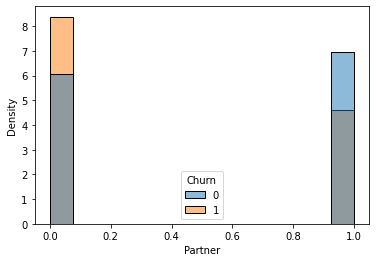

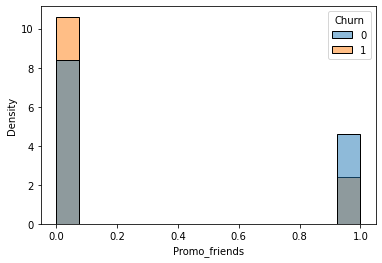

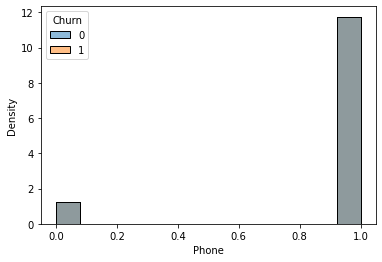

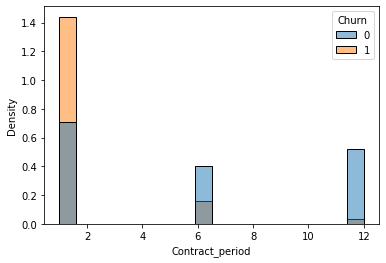

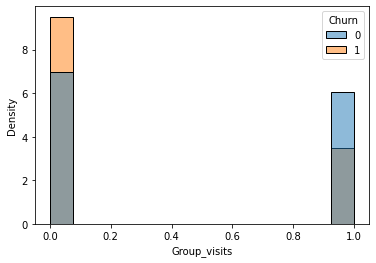

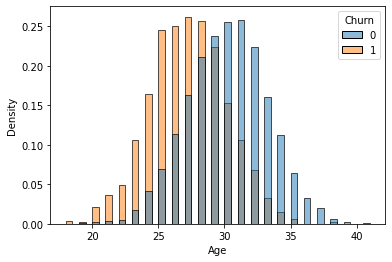

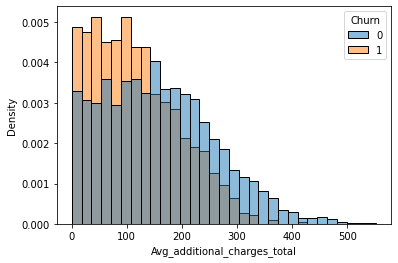

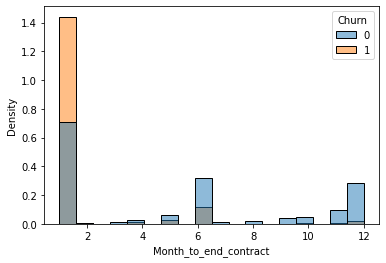

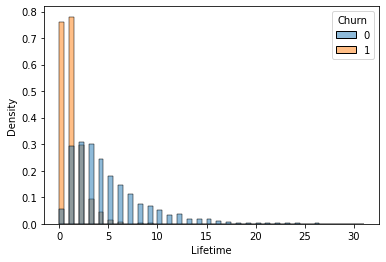

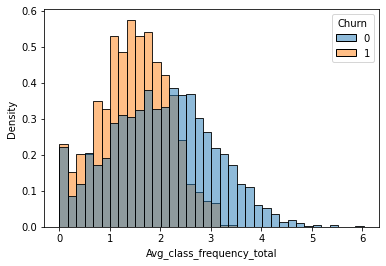

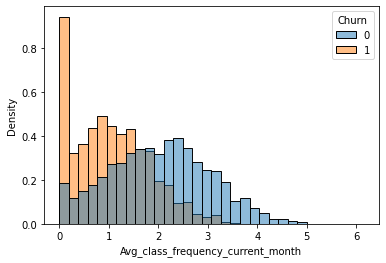

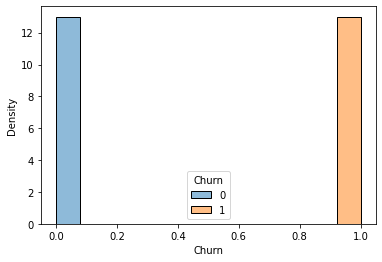

In [7]:
for feature in df.columns:
    sns.histplot(data=df, hue='Churn', x=df[feature], stat="density", common_norm=False)
    plt.show() 

Больше всего нас интересует последний признак, 'Avg_class_frequency_current_month', т.к. он отражает активность клиентов в месяц, предшествовавший оттоку, и мы видим, что у группы тех, кто попал в отток, распределение отличается - они стали приходить реже.

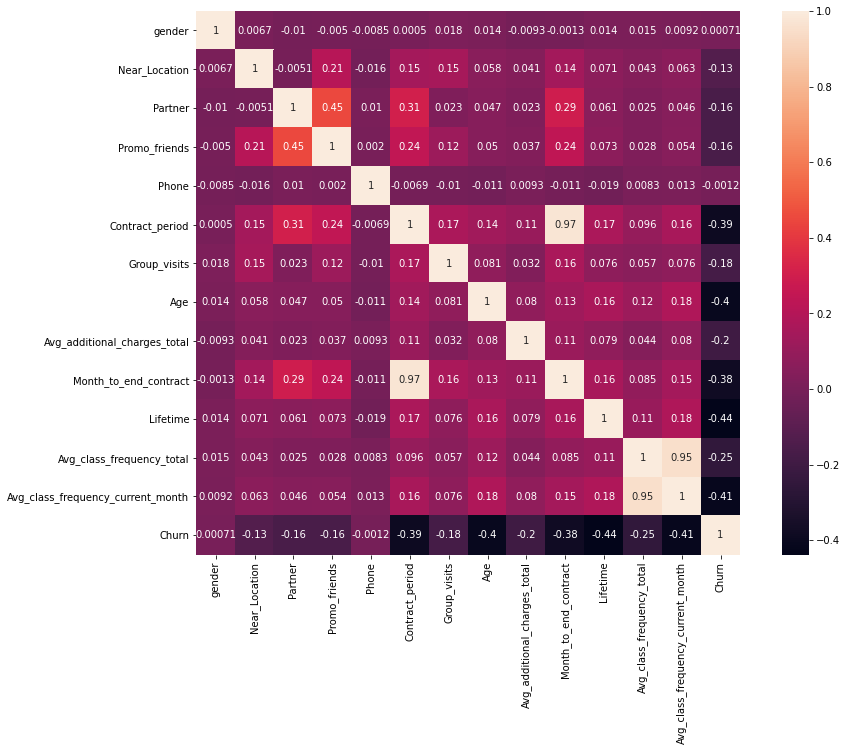

In [8]:
cm = df.corr() #вычисляем матрицу корреляций

#нарисуем тепловую карту с подписями для матрицы корреляции
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, square=True) #ваш код здесь
plt.show()

## Модель прогнозирования оттока

Мы решаем задачу прогнозирования оттока на уровне конкретного клиента на горизонте следующего месяца. Мы используем данные на месяц до оттока и факт оттока на определённый месяц, значит, в этом случае можно использовать random split.

In [9]:
X = df.drop('Churn', axis =1) #ваш код здесь
y = df['Churn']

# разделим данные на обучающую и валидационную выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [10]:
# обучение модели логистической регрессией

model = LogisticRegression(solver='liblinear', random_state = 0) 
model.fit(X_train, y_train)

# прогноз
predictions = model.predict(X_test)

# оценим метрики accuracy, precision и recall на валидационной выборке
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83


In [11]:
# обучение модели случайным лесом
model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
model.fit(X_train, y_train)

# делаем предсказания
predictions = model.predict(X_test)

# оценим метрики accuracy, precision и recall на валидационной выборке
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82


На основании выбранных метрик модель линейной регрессии показала хоть и незначительно, но лучший результат.

## Кластеризация клиентов

In [12]:
# стандартизируем данные

scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
x_sc = scaler.fit_transform(df.drop(columns = ['Churn'])) # обучаем нормализатор и преобразуем набор данных 

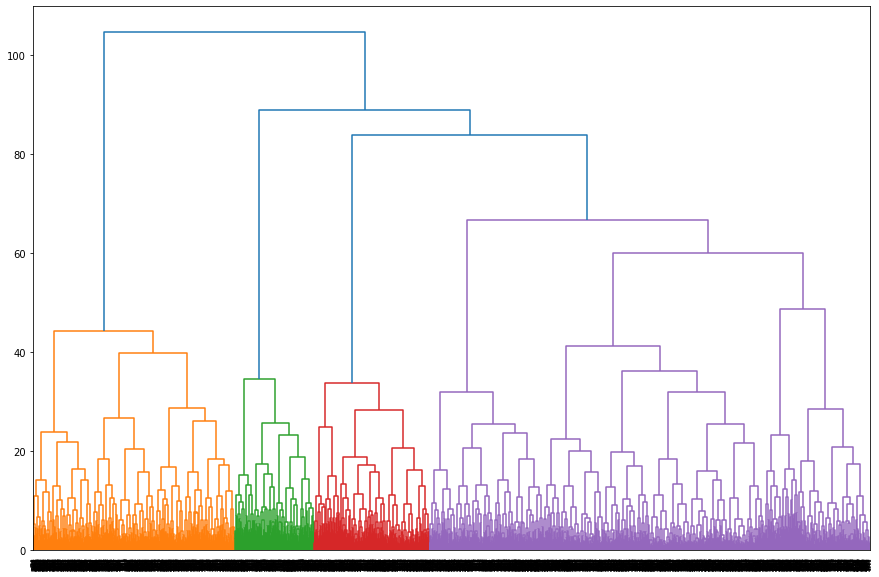

In [13]:
# строим матрицу расстояний функцией linkage() на стандартизованной матрице признаков

linked = linkage(x_sc, method = 'ward') 

# визуализируем как дендрограмму

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

За число кластеров примем 5.

In [14]:
# обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры

km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(x_sc)
# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера: </b> Хорошо. Ещё можно оценить качество кластеризации, например, с помощью коэффициента силуэта.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

Также в реальных задачах необходимо подбирать оптимальное количество кластеров. Здесь может помочь метод локтя и другие:

https://habr.com/ru/company/jetinfosystems/blog/467745/
</div>

In [25]:
# оценка качества кластеризации

print(f'Silhouette Score(n=5): {silhouette_score(x_sc, labels)}')

Silhouette Score(n=5): 0.14140953623023353


Значение положительное, но близкое к нулю, можно интерпретировать как то, что кластеры определены правильно, но пересекаются.

In [16]:
# посмотрим на средние значения признаков для кластеров
df.groupby('cluster_km').mean().reset_index()

,cluster_km,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Можно заметить, например, что у кластеров с меньшим средним значением целевого признака, то есть с меньшим оттоком, средняя частота посещений за последний месяц больше, чем у тех, где отток высокий, также у них выше средняя частота посещений за всё время и суммарная выручка от дополнительных услуг и частота посещения групповых занятий. 

Чтобы проще было разобраться в графиках, можно разбить всех клиентов на "надёжных" и "склонных к оттоку":

In [17]:
reliable = df[(df['cluster_km']==0) | (df['cluster_km']==4)]
not_very_reliable = df[(df['cluster_km']!=0) & (df['cluster_km']!=4)]

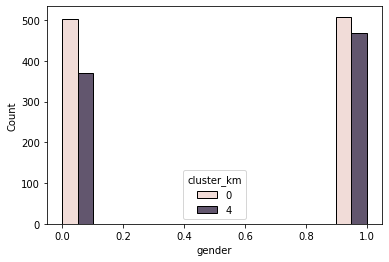

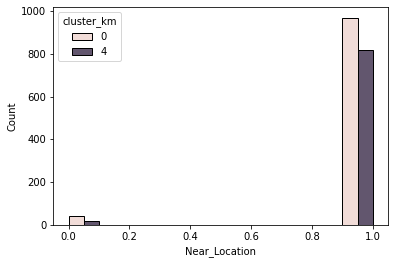

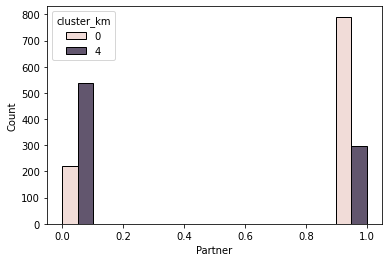

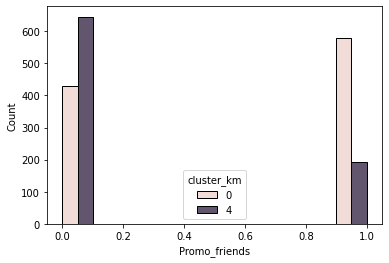

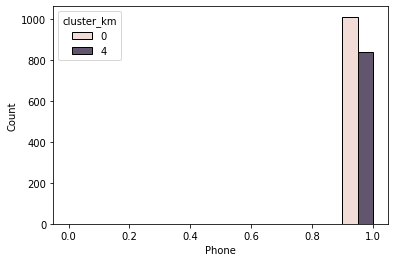

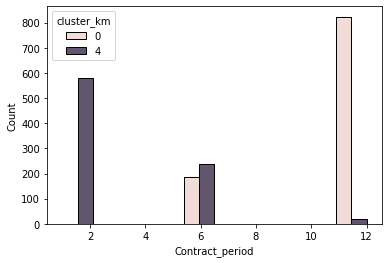

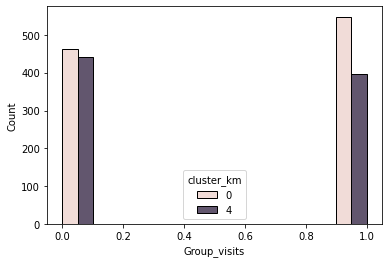

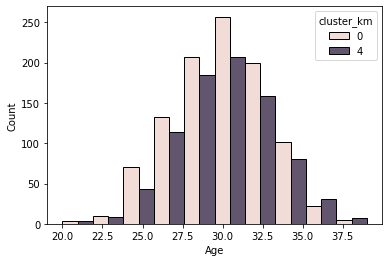

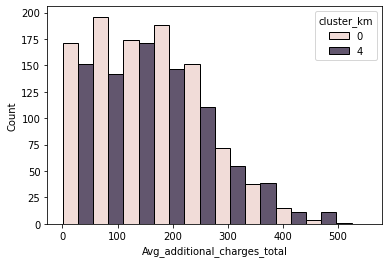

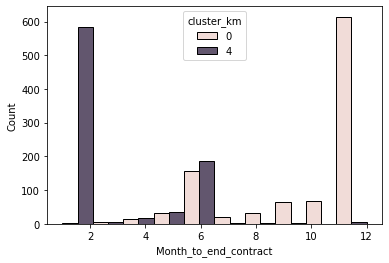

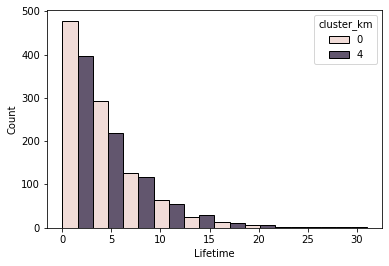

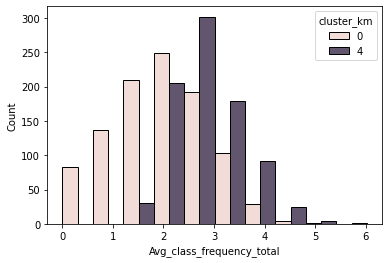

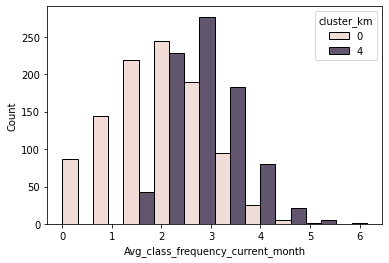

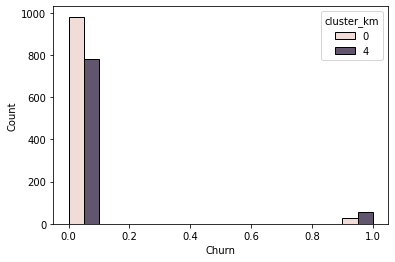

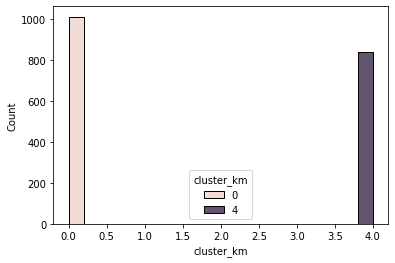

In [18]:
for feature in reliable.columns:
    sns.histplot(data=reliable, x=reliable[feature], bins=10, hue='cluster_km', multiple="dodge")
    plt.show() 

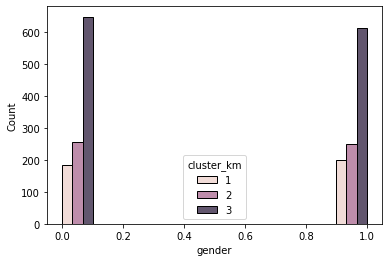

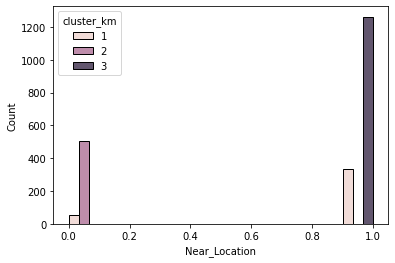

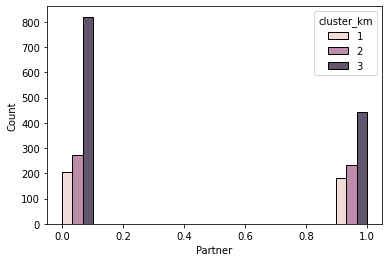

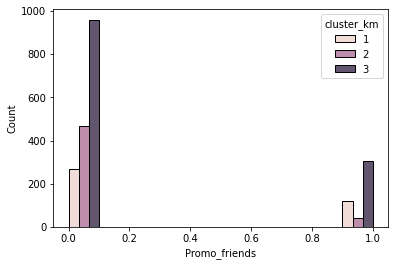

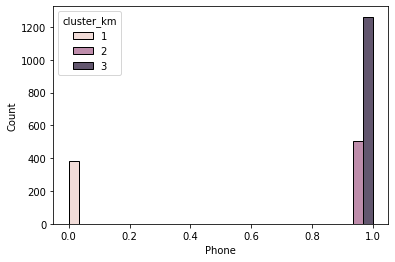

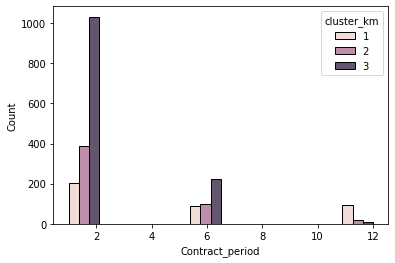

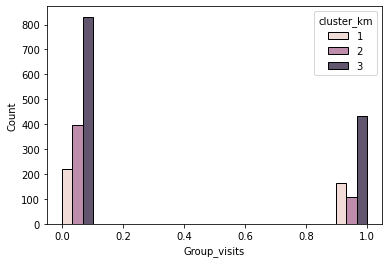

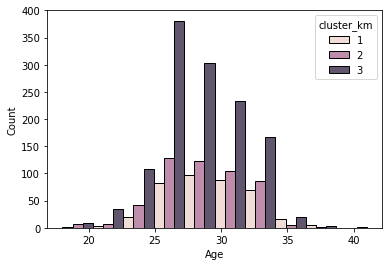

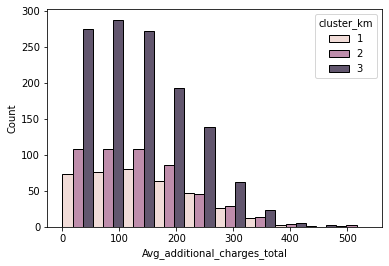

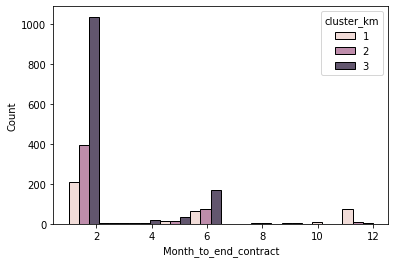

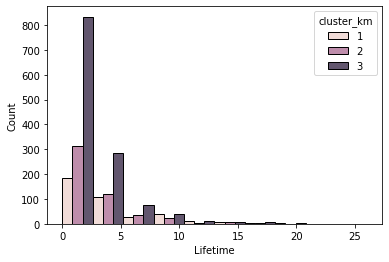

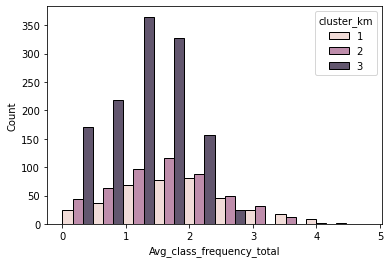

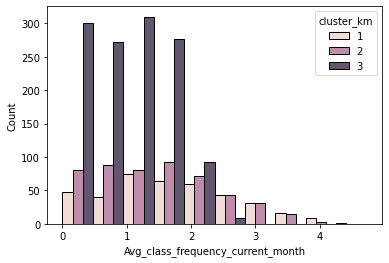

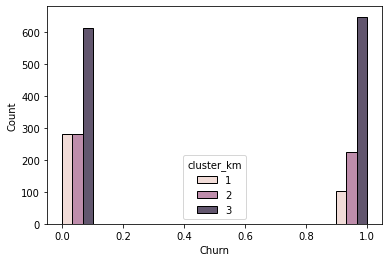

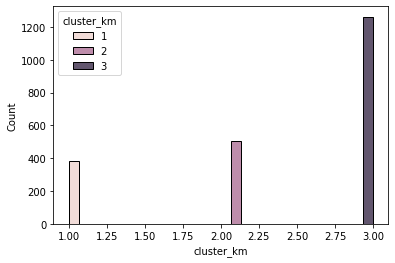

In [19]:
for feature in not_very_reliable.columns:
    sns.histplot(data=not_very_reliable, x=not_very_reliable[feature], bins=10, hue='cluster_km', multiple="dodge")
    plt.show()

In [20]:
# для каждого полученного кластера считаем долю оттока

cg = df.groupby('cluster_km')['Churn'].count().reset_index()
cg1 = df[df['Churn'] == 1].groupby('cluster_km')['Churn'].count().reset_index()
data = cg.merge(cg1, on='cluster_km')

data['share'] = data['Churn_y']/data['Churn_x']
data

,cluster_km,Churn_x,Churn_y,share
0,0,1010,28,0.027723
1,1,385,103,0.267532
2,2,505,224,0.443564
3,3,1262,649,0.514263
4,4,838,57,0.068019


Мы можем выделить 2 наиболее надёжных кластера: 1 и 5, с долей оттока 2.77% и 6.8% соответственно, остальные же три кластера склонны к оттоку на порядок больше. 

## Выводы и рекомендации

Мы построили модель прогнозирования оттока клиентов и определили, что наиболее точные предсказания можно сделать с использованием логистической регрессии. Также мы выделили несколько кластеров, наиболее склонных к оттоку, и обнаружили, какие свойства их отличают от надёжных кластеров:

- ниже средняя частота посещений за всё время
- ниже средняя частота посещений за месяц, предшествующий оттоку 
- средняя частота посещений за месяц, предшествующий оттоку, ниже, чем средняя частота посещений у этого кластера за всё время
- ниже посещаемость групповых занятий
- меньше выручка от дополнительных услуг фитнес-центра

На основе этих данных можно изменить стратегию взаимодействия с "проблемными" клиентами: те, кто не посещают групповые занятия и не пользуются дополнительными услугами (кафе, косметический и массажный салон, приобретение спорттоваров), остаются меньше удовлетворены посещением фитнес-центра и не возвращаются. Возможно, если лучше информировать клиентов о том, какие существуют групповые тренировки, проводить анкетирование и формировать для них персональные рекомендации о том, какие тренировки им подойдут больше всего, то они найдут что-то себе по вкусу, заведут в спортзале новых знакомых и продолжат ходить. То же самое и с дополнительными услугами, только в этом случае можно делать акции, скидки, специальные предложения, можно, напрмер, сделать бонусную систему для всех дополнительных расходов. 